In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-12-03 10:53:25--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  15.1MB/s    in 0.3s    

2023-12-03 10:53:26 (15.1 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import check_random_state
import random
import os

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    check_random_state(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed_everything()

## Data Loading

In [3]:
from pathlib import Path

data_folder = Path("./ml-100k")
data_col_names = ["user_id", "movie_id", "rating", "timestamp"]
user_data_col_names = ["user_id", "age", "gender", "occupation", "zip_code"]
movie_data_col_names = ["movie_id", "title", "release_date", "video_release_data", "url"] + [f"genre_{i}" for i in range(19)]

In [4]:
# load data
data = pd.read_csv(str(data_folder / "u.data"), sep="\t", names=data_col_names, encoding='latin-1')
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# load user data
user_data = pd.read_csv(str(data_folder / "u.user"), sep="|", names=user_data_col_names, encoding='latin-1')
user_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [8]:
# load user data
movie_data = pd.read_csv(str(data_folder / "u.item"), sep="|", names=movie_data_col_names, encoding='latin-1')
movie_data.head()

,movie_id,title,release_date,video_release_data,url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_data  0 non-null      float64
 4   url                 1679 non-null   object 
 5   genre_0             1682 non-null   int64  
 6   genre_1             1682 non-null   int64  
 7   genre_2             1682 non-null   int64  
 8   genre_3             1682 non-null   int64  
 9   genre_4             1682 non-null   int64  
 10  genre_5             1682 non-null   int64  
 11  genre_6             1682 non-null   int64  
 12  genre_7             1682 non-null   int64  
 13  genre_8             1682 non-null   int64  
 14  genre_9             1682 non-null   int64  
 15  genre_10            1682 non-null   int64  
 16  genre_

In [10]:
# merge everything into one dataset

user_movies = pd.merge(user_data, data)
total_data = pd.merge(user_movies, movie_data)
total_data.head()

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,title,release_date,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# check that we did not mess up
assert len(total_data["user_id"].unique()) == len(user_data["user_id"])
assert len(total_data["movie_id"].unique()) == len(movie_data["movie_id"])

## Little bit of EDA

In [41]:
# Top-Rated Movies by Average Rating
grouped_data = total_data.groupby('title')
top_movies = grouped_data['rating'].mean()[grouped_data['rating'].size() > 50].sort_values(ascending=False)
top_movies.head(10)

title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Shawshank Redemption, The (1994)                          4.445230
Rear Window (1954)                                        4.387560
Usual Suspects, The (1995)                                4.385768
Star Wars (1977)                                          4.358491
12 Angry Men (1957)                                       4.344000
Name: rating, dtype: float64

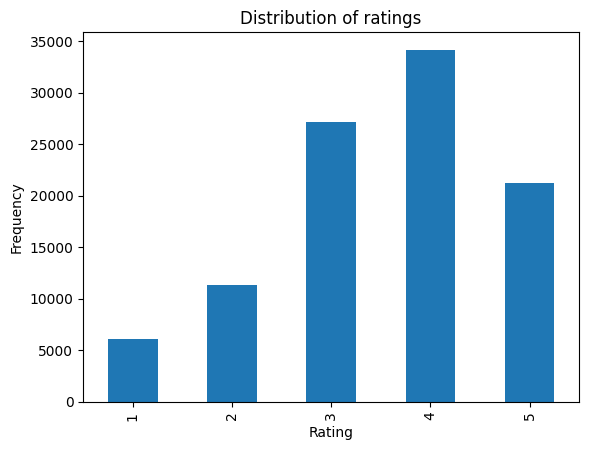

In [36]:
total_data["rating"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of ratings")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

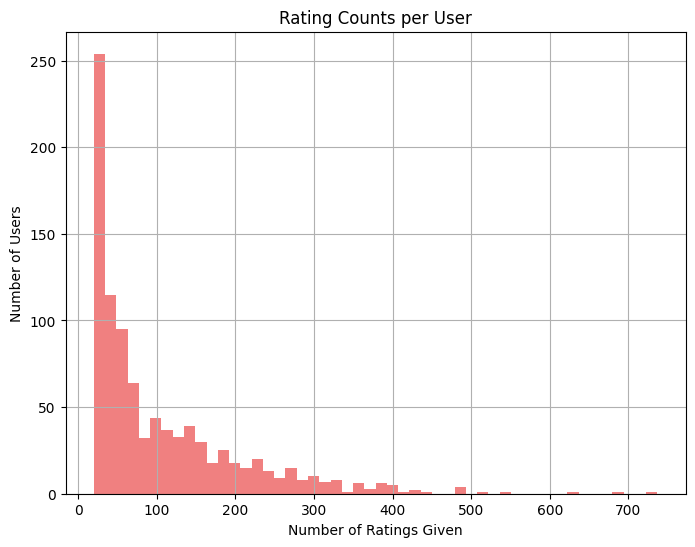

In [42]:
# Rating Counts per User
user_rating_counts = total_data['user_id'].value_counts()

plt.figure(figsize=(8, 6))
user_rating_counts.hist(bins=50, color='lightcoral')
plt.title('Rating Counts per User')
plt.xlabel('Number of Ratings Given')
plt.ylabel('Number of Users')
plt.show()

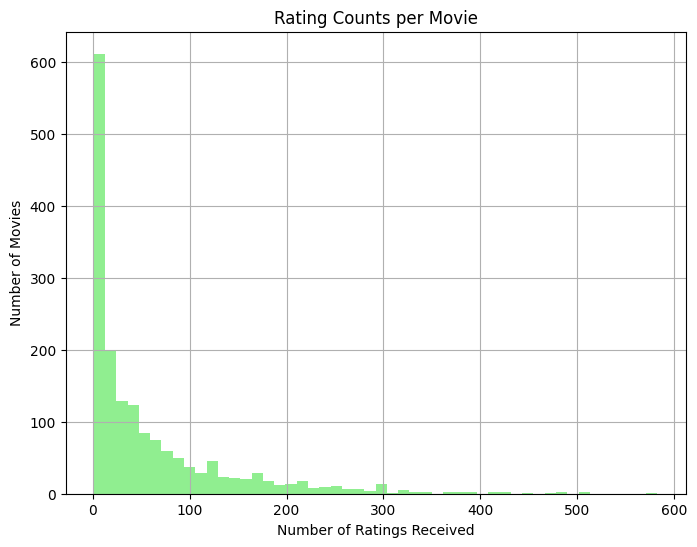

In [43]:
# Rating Counts per Movie
movie_rating_counts = total_data['movie_id'].value_counts()

plt.figure(figsize=(8, 6))
movie_rating_counts.hist(bins=50, color='lightgreen')
plt.title('Rating Counts per Movie')
plt.xlabel('Number of Ratings Received')
plt.ylabel('Number of Movies')
plt.show()

In [50]:
import pandas as pd

# Grouping data by occupation and movie title to calculate average rating
groupped_data = total_data.groupby(['occupation', 'title'])
occupation_movie_ratings = groupped_data['rating'].mean()[groupped_data['rating'].size() > 10].reset_index()

# Sorting the average ratings within each occupation group
occupation_movie_ratings = occupation_movie_ratings.sort_values(by=['occupation', 'rating'], ascending=[True, False])

# Selecting top 3 movies for each occupation
top3_movies_by_occupation = occupation_movie_ratings.groupby('occupation').head(3)

# Displaying the top 3 movies for each occupation
top3_movies_by_occupation.head(-1)

,occupation,title,rating
179,administrator,Schindler's List (1993),4.631579
130,administrator,"Magnificent Seven, The (1954)",4.583333
185,administrator,"Shawshank Redemption, The (1994)",4.571429
247,artist,Star Wars (1977),4.666667
242,artist,"Godfather, The (1972)",4.500000
244,artist,Raiders of the Lost Ark (1981),4.461538
384,educator,Hoop Dreams (1994),4.692308
521,educator,Taxi Driver (1976),4.647059
486,educator,Schindler's List (1993),4.600000
828,engineer,"Wrong Trousers, The (1993)",4.642857


## Simple colaborative filtering
Inspired by
- https://www.kaggle.com/code/abhikjha/movielens-fastai-collab#Collaborative-Filtering-using-SVD
- https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab

In [125]:
train_df = pd.read_csv(str(data_folder / "ua.base"), sep="\t", names=data_col_names, encoding='latin-1')
test_df = pd.read_csv(str(data_folder / "ua.test"), sep="\t", names=data_col_names, encoding='latin-1')

In [134]:
rating_matrix = train_df.pivot(index="movie_id", columns="user_id", values="rating").fillna(0)
rating_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric="cosine", algorithm='brute')
knn.fit(rating_matrix.values)
distances, neighbors = knn.kneighbors(rating_matrix.values, n_neighbors=100)

In [128]:
from tqdm import tqdm

def calculate_rating(neighbors_dists, user_rating_history):
    # calculate projected rating
    sum_sim = 0
    weighted_sum_ratings = 0
    for movie_dist, movie_index in neighbors_dists:
        cur_movie_id = movie_index + 1
        sim = 1 - movie_dist
        sum_sim += sim
        weighted_sum_ratings += user_rating_history[cur_movie_id] * sim

    if weighted_sum_ratings == 0:
        return 0
    return weighted_sum_ratings / sum_sim


# predict ratings of movies that user_id has not watched
def predict_movie_rating(user_id, movie_id, distances, neighbors, rating_matrix, top_k=10):
    # determine distances and similarities
    movie_index = rating_matrix.index.tolist().index(movie_id)
    # distances, neighbors = knn.kneighbors([rating_matrix.loc[movie_id]], n_neighbors=n_neighbors)
    movie_dists = distances[movie_index].tolist()
    movie_neighbors = neighbors[movie_index].tolist()

    # remove the movie itself from the data
    cur_ind = movie_neighbors.index(movie_index)
    movie_dists.pop(cur_ind)
    movie_neighbors.pop(cur_ind)

    user_rating_history = rating_matrix[user_id]
    seen_movies = set(user_rating_history[user_rating_history != 0].index)
    neighbors_dists = list(filter(lambda x: (x[1] + 1) in seen_movies,
                                  zip(movie_dists, movie_neighbors)))[:top_k]

    return calculate_rating(neighbors_dists, user_rating_history)


def predict_unseen(user_id, distances, neighbors, rating_matrix, verbose=True):
    user_rating_history = rating_matrix[user_id]
    unseen_movies = user_rating_history[user_rating_history == 0].index

    ratings = []
    if verbose:
        pbar = tqdm(unseen_movies, desc="Predicting ratings")
    else:
        pbar = unseen_movies
    for movie_id in pbar:
        rating = predict_movie_rating(user_id, movie_id,
                                      distances, neighbors, rating_matrix)
        ratings.append(rating)
        if verbose:
            pbar.set_postfix({"movie_id": movie_id})

    return pd.DataFrame({"movie_id": unseen_movies, "pred_rating": ratings})


def recommend_unseen(user_id, distances, neighbors, rating_matrix, top_k=10):
    rating_predictions = predict_unseen(user_id, distances, neighbors, rating_matrix)
    rating_predictions = rating_predictions.sort_values("pred_rating", ascending=False).head(top_k)
    return rating_predictions

In [129]:
user_id = 7
recomended = recommend_unseen(user_id, distances, neighbors, rating_matrix)
recomended

Predicting ratings: 100%|██████████| 1287/1287 [00:03<00:00, 381.09it/s, movie_id=1682]


,movie_id,pred_rating
71,124,5.000000
1215,1610,5.000000
1233,1628,5.000000
89,169,5.000000
94,209,5.000000
92,189,4.904015
30,48,4.903657
569,963,4.902811
86,163,4.902069
63,114,4.892119


In [130]:
rated = test_df[test_df["user_id"] == user_id]
rated

,user_id,movie_id,rating,timestamp
60,7,32,4,891350932
61,7,163,4,891353444
62,7,382,4,891352093
63,7,430,3,891352178
64,7,455,4,891353086
65,7,479,4,891352010
66,7,492,5,891352010
67,7,497,4,891352134
68,7,648,5,891351653
69,7,661,5,891351624


## Simple evaluation

In [131]:
from sklearn.metrics import mean_squared_error

def rmse(true_data, predictions):
    combined = true_data.merge(predictions)
    true_ratings = combined["rating"].values
    pred_ratings = combined["pred_rating"].values
    return np.sqrt(mean_squared_error(true_ratings, pred_ratings))

def presicion(true_data, predictions, k=10, good_threshold=3.5):
    relevant_items = set(true_data["movie_id"][true_data["rating"] >= good_threshold].values)
    if len(relevant_items) == 0:
        return None
    recommended = predictions[predictions["pred_rating"] >= good_threshold].sort_values("pred_rating", ascending=False)["movie_id"].values[:k]
    return sum(rec in relevant_items for rec in recommended) / len(recommended)

def recall(true_data, predictions, k=10, good_threshold=3.5):
    relevant_items = set(true_data["movie_id"][true_data["rating"] >= good_threshold].values)
    if len(relevant_items) == 0:
        return None
    recommended = predictions[predictions["pred_rating"] >= good_threshold].sort_values("pred_rating", ascending=False)["movie_id"].values[:k]
    return sum(rec in relevant_items for rec in recommended) / len(relevant_items)

In [132]:
evaluation_user_list = test_df["user_id"].unique()

ks = [10, 20, 50]
scores = {
    "RMSE": []
}
for k in ks:
    scores[f"Presicion@{k}"] = []
    scores[f"Recall@{k}"] = []

for user_id in tqdm(evaluation_user_list):
    preds = predict_unseen(user_id, distances, neighbors, rating_matrix, verbose=False)
    true_data = test_df[["movie_id", "rating"]][test_df["user_id"] == user_id]

    scores["RMSE"].append(rmse(true_data, preds))
    for k in ks:
        score = presicion(true_data, preds, k=k)
        if score is not None:
            scores[f"Presicion@{k}"].append(score)

        score = recall(true_data, preds, k=k)
        if score is not None:
            scores[f"Recall@{k}"].append(score)

100%|██████████| 943/943 [09:29<00:00,  1.65it/s]


In [133]:
for score, score_data in scores.items():
    print(f"{score}: {np.mean(score_data):.2f}")

RMSE: 0.99
Presicion@10: 0.01
Recall@10: 0.01
Presicion@20: 0.01
Recall@20: 0.02
Presicion@50: 0.01
Recall@50: 0.06
